## Understanding the relationship between high-dimensional data points using manifold learning

* Manifold learning is often used is in understanding the relationship between high-dimensional data points. 
* A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.
    
 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import offsetbox

### Load, explore Data
* 400 images with 4096 pixels. 
* The images can be thought of as data points in a 4096-dimensional space.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/loonycorn/scikit_learn_data


In [3]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

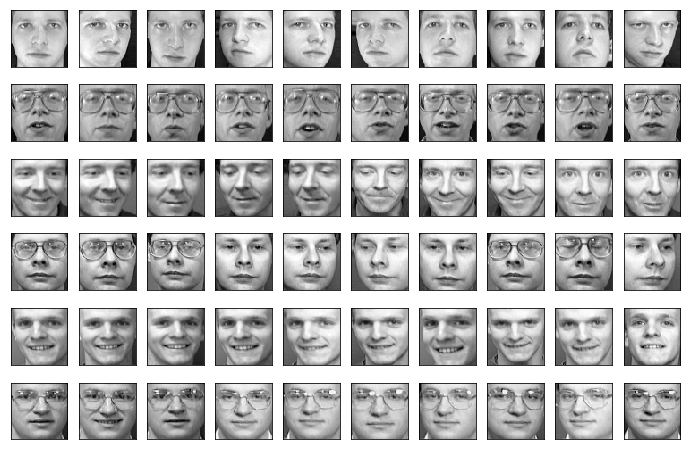

In [7]:
fig, ax = plt.subplots(6, 10, figsize=(12, 8), subplot_kw=dict(xticks = [], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

In [8]:
X = faces.data

y = faces.target

In [9]:
X.shape

(400, 4096)

In [10]:
pd.DataFrame(X).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
147,0.537190,0.520661,0.537190,0.595041,0.640496,0.702479,0.731405,0.673554,0.599174,0.557851,...,0.508264,0.516529,0.524793,0.495868,0.491736,0.504132,0.483471,0.495868,0.500000,0.491736
190,0.479339,0.549587,0.628099,0.690083,0.677686,0.652893,0.640496,0.636364,0.648760,0.648760,...,0.301653,0.214876,0.219008,0.219008,0.223140,0.223140,0.227273,0.223140,0.219008,0.227273
42,0.661157,0.661157,0.665289,0.669421,0.702479,0.727273,0.743802,0.756198,0.768595,0.760331,...,0.214876,0.206612,0.206612,0.206612,0.206612,0.206612,0.206612,0.214876,0.210744,0.223140
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
276,0.706612,0.702479,0.735537,0.780992,0.789256,0.772727,0.789256,0.789256,0.789256,0.776860,...,0.202479,0.140496,0.152893,0.161157,0.148760,0.181818,0.210744,0.152893,0.177686,0.107438
132,0.669421,0.636364,0.648760,0.685950,0.710744,0.760331,0.768595,0.805785,0.793388,0.809917,...,0.227273,0.223140,0.219008,0.115702,0.090909,0.090909,0.095041,0.086777,0.082645,0.074380
178,0.421488,0.450413,0.512397,0.533058,0.504132,0.524793,0.524793,0.549587,0.599174,0.615702,...,0.214876,0.256198,0.247934,0.247934,0.256198,0.264463,0.293388,0.330579,0.322314,0.338843
320,0.123967,0.099174,0.123967,0.107438,0.107438,0.128099,0.128099,0.132231,0.148760,0.148760,...,0.330579,0.082645,0.165289,0.404959,0.632231,0.603306,0.177686,0.479339,0.619835,0.615702
149,0.566116,0.595041,0.603306,0.619835,0.636364,0.640496,0.661157,0.681818,0.685950,0.694215,...,0.404959,0.413223,0.404959,0.392562,0.384298,0.380165,0.376033,0.380165,0.351240,0.351240
148,0.520661,0.549587,0.586777,0.590909,0.607438,0.611570,0.648760,0.661157,0.665289,0.677686,...,0.500000,0.483471,0.438017,0.442149,0.425620,0.413223,0.400826,0.367769,0.371901,0.305785


In [11]:
y.shape

(400,)

In [12]:
pd.DataFrame(y).sample(10)

,0
261,26
163,16
32,3
93,9
65,6
266,26
213,21
165,16
128,12
176,17


### Find principle components
* RandomizedPCA: Principal component analysis (PCA) using randomized SVD

In [13]:
from sklearn.decomposition import PCA

model = PCA(100).fit(X)

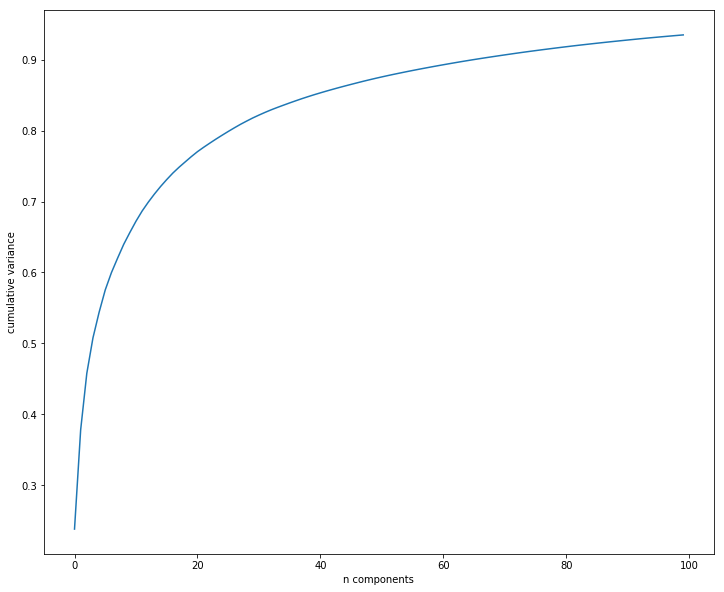

In [14]:
plt.figure(figsize = (12, 10))
plt.plot(np.cumsum(model.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [17]:
def plot_components(data, X_new, images = None, ax = None, thumb_frac = 0.05, cmap = 'gray'):
    
    ax = ax or plt.gca()
    ax.plot(X_new[:, 0], X_new[:, 1], '.k')
    
    if images is not None:
        
        min_dist = (thumb_frac * max( X_new.max(0) - X_new.min(0) )) ** 2
        shown_images = np.array( [2 * X_new.max(0)] )
        
        for i in range(data.shape[0]):
            
            dist = np.sum((X_new[i] - shown_images) ** 2, 1)
            
            if np.min(dist) < min_dist:
                continue                            # don't show points that are too close
                
            shown_images = np.vstack([shown_images, X_new[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap = cmap), X_new[i])
            
            ax.add_artist(imagebox)

## Apply Manifold Learning

In [18]:
def apply_manifold_learning(X, method, show_scatter_plot = False):
    
    X_new = method.fit_transform(X)
    
    print ("New shape of X : ", X_new.shape)
    print()
    print ("Sample X : \n")
    print (pd.DataFrame(X_new).sample(10))
    print()

    if show_scatter_plot is not False:
        
        fig, ax = plt.subplots(figsize = (12, 10))
        ax.scatter(X_new[:, 0], X_new[:, 1], cmap = 'Spectral')
        plt.xlabel('X[0] after transformation')
        plt.ylabel('X[1] after transformation');
    
    fig, ax = plt.subplots(figsize = (12, 8))
    plot_components(X[:20,:], X_new[:20,:], images = faces.images[:, ::2, ::2])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2');
    
    return method

### Apply MDS

* Nearly 100 components are required to preserve 90% of the variance
* The data is intrinsically very high dimensional
* It can't be described linearly with just a few components.

* When this is the case, nonlinear manifold embeddings can be used to get a two-dimensional projection of all the input images
* Apply mds to get two components
* n_init : Number of times the SMACOF algorithm will be run with different initializations. The final results will be the best output of the runs, determined by the run with the smallest final stress.
* max_iter : Maximum number of iterations of the SMACOF algorithm for a single run.

New shape of X :  (400, 2)

Sample X : 

             0          1
361  -8.793964   7.926790
232   0.485007  12.912576
142   0.808219  -6.507094
195  -3.300549  -2.513789
38   -4.304216  -5.556834
338 -11.053010  -2.916674
79   -1.070059  13.053556
295  -2.324824   1.462750
213 -10.729868   5.618836
222  -1.066406  -0.081370



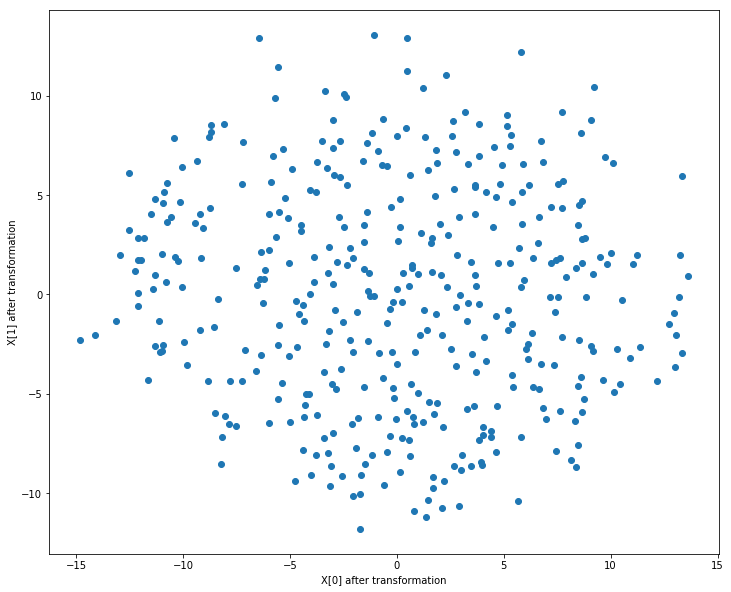

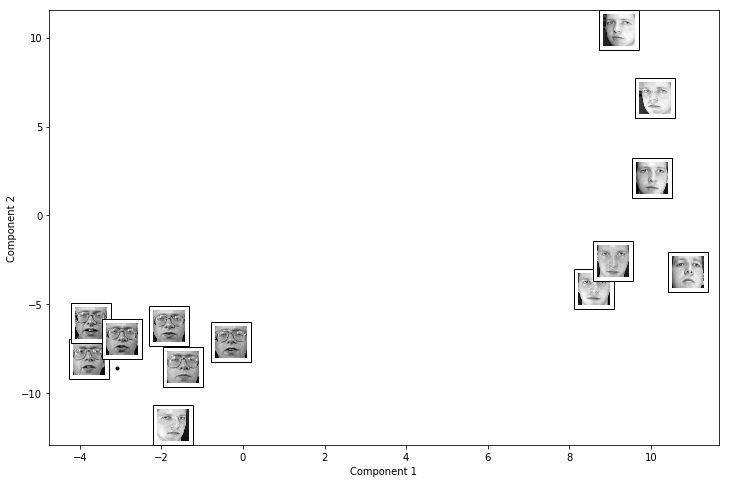

In [22]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, 
        MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100), \
        show_scatter_plot = True )

### Apply Isomap
* Represent 4906-dim data in 2d

New shape of X :  (400, 2)

Sample X : 

             0         1
21    5.338901  8.717576
244  -0.977251  1.635322
26    0.904278 -8.052272
316  -6.070040  7.875334
125  -3.698859  0.454319
79   -9.305395  6.462801
308  10.470974  1.534534
360   6.766219  2.085278
332  22.458532  7.026466
388  25.731790 -1.632046



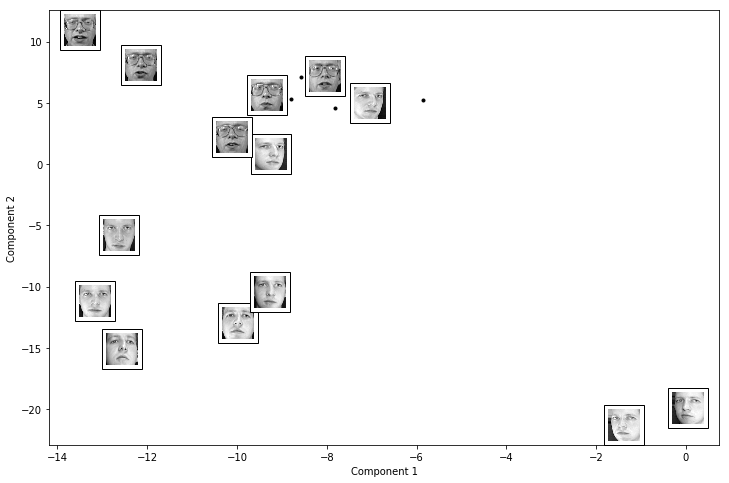

In [23]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors = 10, n_components = 2))

### Apply LLE

New shape of X :  (400, 2)

Sample X : 

            0         1
39   0.025089  0.017667
85   0.011455  0.029128
256  0.022986  0.024362
226  0.024366  0.031666
157  0.018054  0.019106
134  0.022844  0.022926
118  0.022081  0.028531
165  0.013065  0.024116
214 -0.181262 -0.035514
131  0.021447  0.024719



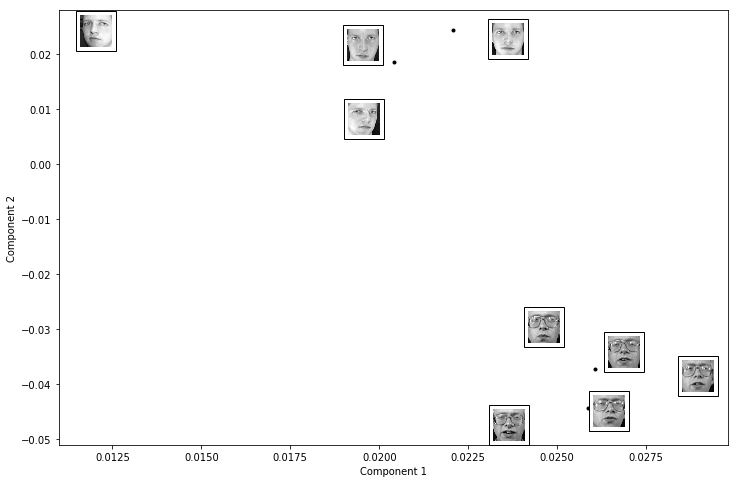

In [24]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'standard'))

### Apply HLLE

New shape of X :  (400, 2)

Sample X : 

            0         1
12  -0.000645 -0.022453
397  0.005244 -0.013019
108  0.004085 -0.021588
328  0.008244  0.003602
152  0.005096 -0.018888
179  0.006353 -0.017728
23   0.005699 -0.008956
253  0.006040 -0.008601
163  0.005191 -0.013067
324  0.009223  0.007119



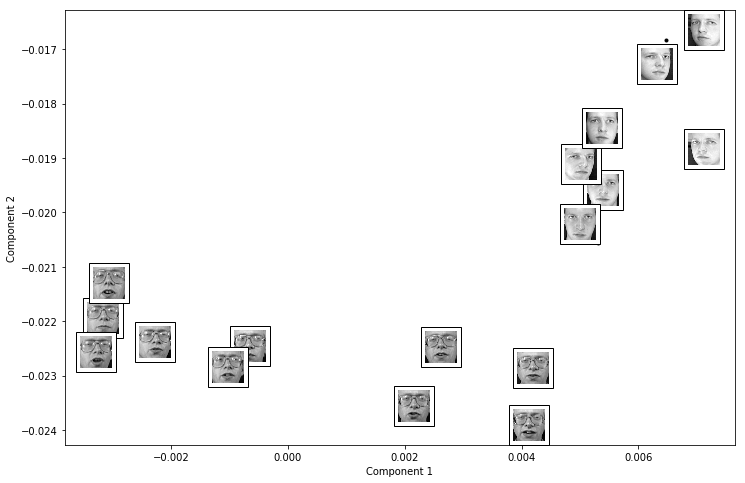

In [25]:
hlle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'hessian'))

### Apply Spectral Embedding

New shape of X :  (400, 2)

Sample X : 

            0         1
145 -0.004605 -0.006488
137 -0.003810 -0.007393
281  0.020743  0.000840
54  -0.006747  0.011621
138 -0.002938 -0.011874
109 -0.006343 -0.013098
10  -0.005412 -0.005130
257 -0.001236 -0.009716
354 -0.006547  0.005454
115 -0.004916  0.013077



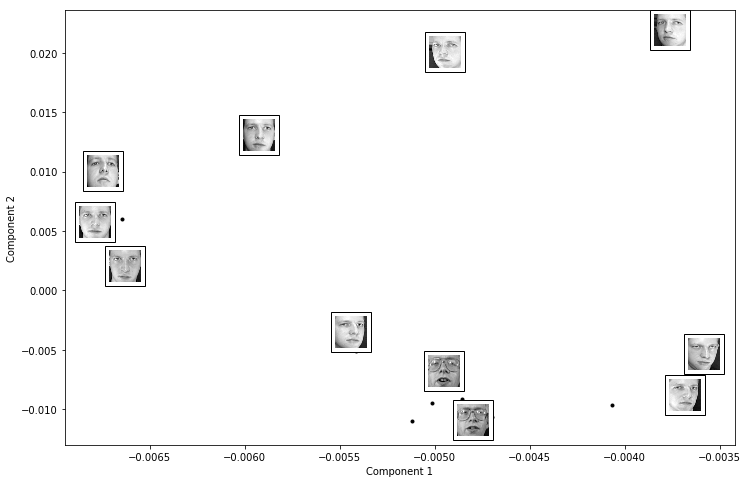

In [26]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, \
    SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

### Apply t-SNE

New shape of X :  (400, 2)

Sample X : 

             0          1
250  -3.205000  12.572634
176 -15.249269  -5.770834
395   4.398705   8.826588
34   -9.893475  -7.218468
133 -14.042523   7.247500
46    0.959312  -1.050784
103 -11.999728 -24.077946
23    0.954322  16.300289
201  13.851388  14.025209
294  11.034710  13.684137



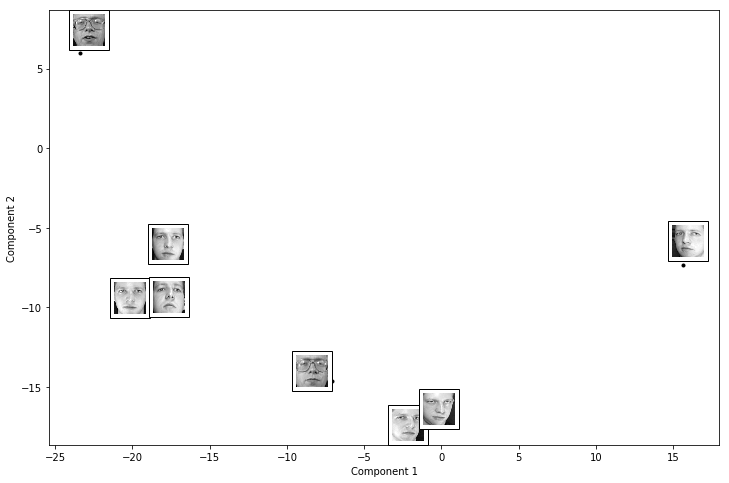

In [27]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))